In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from dateutil.relativedelta import relativedelta
from datetime import date, datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from boruta import BorutaPy
from sklearn.feature_selection import RFE

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/Open IIT Data Analytics-20190902T005211Z-001/Open IIT Data Analytics/in.csv")

Label Encoding


In [3]:
label_encode=LabelEncoder()

In [4]:
data['EmploymentStatus']=label_encode.fit_transform(data['EmploymentStatus'])
data['Gender']=label_encode.fit_transform(data['Gender'])
data['Vehicle Class']=label_encode.fit_transform(data['Vehicle Class'])
data['Vehicle Size']=label_encode.fit_transform(data['Vehicle Size'])
data['Sales Channel']=label_encode.fit_transform(data['Sales Channel'])
data['Renew Offer Type']=label_encode.fit_transform(data['Renew Offer Type'])
data['Response']=label_encode.fit_transform(data['Response'])
data['Education']=label_encode.fit_transform(data['Education'])
data['Coverage']=label_encode.fit_transform(data['Coverage'])
data['Location Code']=label_encode.fit_transform(data['Location Code'])
data['Policy Type']=label_encode.fit_transform(data['Policy Type'])
data['Policy']=label_encode.fit_transform(data['Policy'])
data['State']=label_encode.fit_transform(data['State'])
data['Marital Status']=label_encode.fit_transform(data['Marital Status'])


# Feature Engineering

1. Feature engineering on Monthly premium auto and Income

In [5]:
# we are creating this feature to find the fraction of income , paid as monthly premium
epsilion =1
FractionOfIncomePaid=data['Monthly Premium Auto']/(data['Income']+epsilion)

2. Feature Enginnering on features(Monthly premium auto,Month since last claim,month since policy inception,total claim amount,Number of policies)

In [6]:
#we are creating this feature to find minimum profit earned by company per policy
feature_1=((data['Months Since Policy Inception']+data['Months Since Last Claim'])*data['Monthly Premium Auto']-data['Total Claim Amount'])/data['Number of Policies']

3.Feature engineering on Monthly premium auto and Total claim amount

In [7]:
#we are creating this feature to find how good is the relationship betweeen customer and company depending upon profit
feature_2=1-(1/(data['Monthly Premium Auto']-data['Total Claim Amount']))

In [8]:
#concating new features to our dataset
data=pd.concat([data,FractionOfIncomePaid,feature_1,feature_2],axis=1)

In [9]:
#finding correlation between features
cor=data.corr()

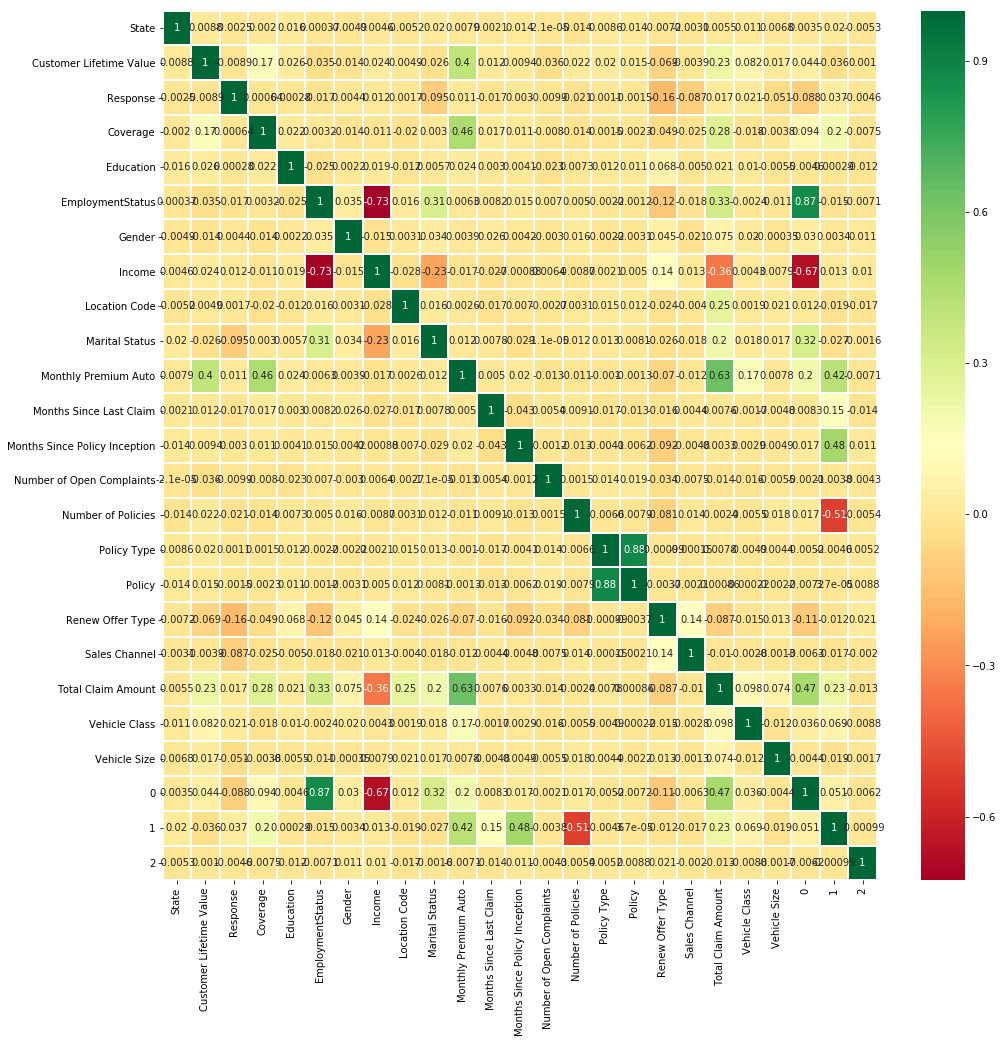

In [10]:
#plotting features correlation
plt.figure(figsize=(16,16))
sns.heatmap(cor,cmap='RdYlGn',annot=True,linewidth=1,linecolor='white')
plt.savefig("correlation.png")

In [13]:
'''since we are seen to be highly correlated ,we are dropping that features(whose correlation is >0.6)
we drop income and employment status due to their correlation from new feature -0.67,0.87 
we drop total claim amount due to correlation from Monthly Premium Auto 0.63
we drop policy due to correlation from Policy type  0.88'''
data.drop(['Policy','Total Claim Amount','Income','EmploymentStatus'],axis=1, inplace=True)
# we drop Customer as each customer has a unique ID
data.drop(['Customer'],axis=1,inplace=True)


           
           


In [14]:
df=data[[ 'State',       'Customer Lifetime Value',
                            'Response',                      'Coverage',
                           'Education',             
                              'Gender',                        
                       'Location Code',                'Marital Status',
                'Monthly Premium Auto',       'Months Since Last Claim',
       'Months Since Policy Inception',     'Number of Open Complaints',
                  'Number of Policies',                   'Policy Type',
                                            'Renew Offer Type',
                       'Sales Channel',           
                       'Vehicle Class',                  'Vehicle Size',0,
                                     1,                               2]]

In [15]:
X=df.drop('Customer Lifetime Value',axis=1)
y=df['Customer Lifetime Value']

#Splitting the data into training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1111,random_state=42)

In [81]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:55:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [85]:
#performing k fold validation and predicting the r2 value for xg boost
score1 = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')
score1.mean()



C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:58:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:59:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:00:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:02:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6444164095944892

In [89]:
rfe = RFE(best_xgb_model, 6)
rfe = rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)


[23:06:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:10:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:11:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:12:19] WARNI

In [20]:
#we are neglecting feature with feature importance <0.05
X_new=X.drop(['State','Location Code','Marital Status','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)

In [18]:
X_new_train,X_new_test,y_train,y_test=train_test_split(X,y,test_size=0.1111,random_state=42)

In [ ]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_new_train,y_train)

In [23]:
X_new.head(7)

,Response,Coverage,Education,Gender,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,0,1,2
0,0,0,0,0,69,32,5,0,1,0,0.001226,2168.188853,1.003166
1,0,1,0,0,94,13,42,0,8,1,94.000000,504.816883,1.000964
2,0,2,0,0,108,18,38,0,2,1,0.002215,2740.763877,1.002181
3,0,0,0,1,106,18,65,0,7,0,106.000000,1181.159808,1.002359
4,0,0,0,1,73,12,44,0,1,1,0.001665,3949.869121,1.015354
5,1,0,0,0,69,14,94,0,2,1,0.001097,3646.308479,1.011064
6,1,0,1,0,67,0,13,0,9,0,0.001210,61.044444,1.003928


In [ ]:
score1 = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')
score1.mean()


In [ ]:
#fitting the training data on Random Forest Regressor and predicting the value
rfc=RandomForestRegressor(random_state=42,bootstrap = True, max_features=6, min_samples_split= 4, n_estimators= 2500)
rfc.fit(X_train,y_train)
y_pred_randomforest=rfc.predict(X_test)
#performing k fold validation and predicting the r2 value for random forest
scores = cross_val_score(rfc, X, y, cv=5, scoring='r2')
scores.mean()

In [ ]:
#we are neglecting feature with feature importance <0.05
X_new=df.drop(['State','Education','Location Code','Marital Status','Month Since Policy Inception','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)

In [ ]:
X_new_train,X_new_test,y_train,y_test=train_test_split(X,y,test_size=0.1111,random_state=42)

In [ ]:
#fitting the training data on Random Forest Regressor and predicting the value
rfc=RandomForestRegressor(random_state=42,bootstrap = True, max_features=6, min_samples_split= 4, n_estimators= 2500)
rfc.fit(X_new_train,y_train)
y_pred_randomforest=rfc.predict(X_new_test)
#performing k fold validation and predicting the r2 value for random forest
scores = cross_val_score(rfc, X, y, cv=5, scoring='r2')
scores.mean()

# Feature Importance for Random forest

In [ ]:

boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
boruta_selector.fit(X,y)
boruta_selector.ranking_




rfe = RFE(rfc, 6)
rfe = rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)

# Correlation

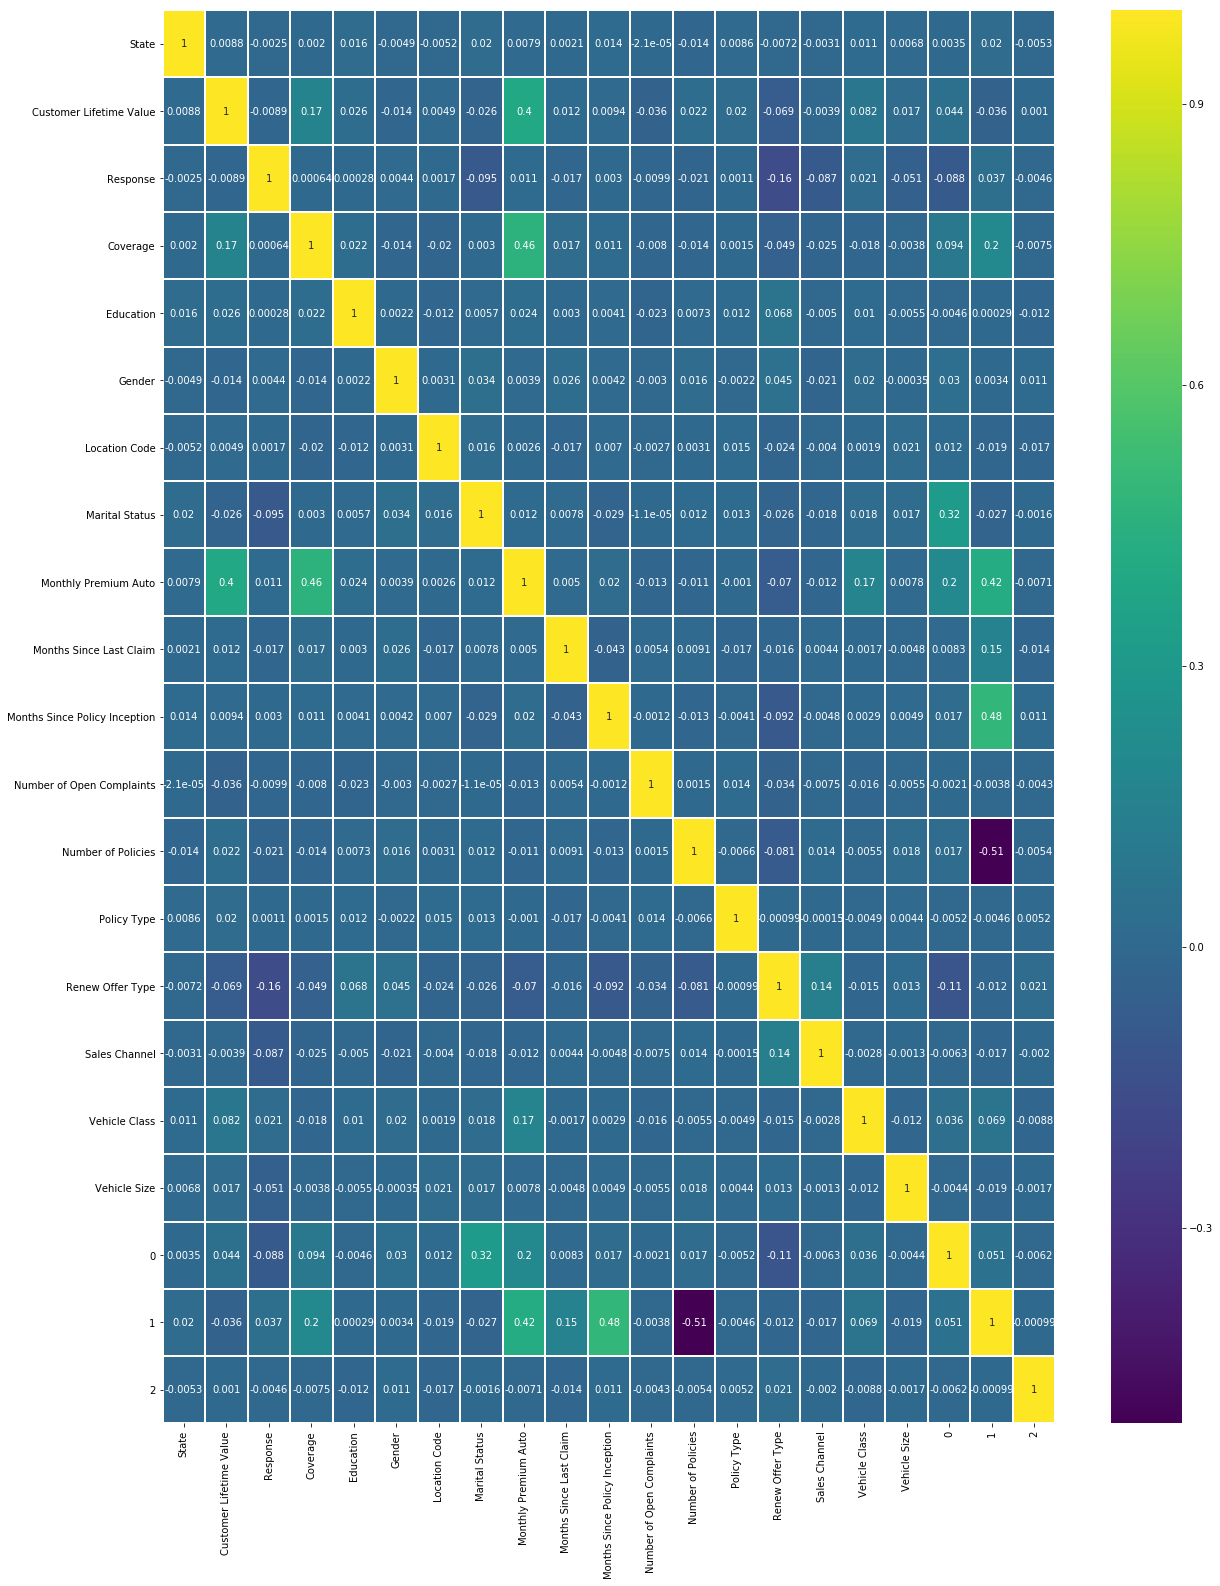

In [24]:
cor_pearson=df.corr(method="pearson")
cor_pearson.to_csv("pearson_corelation.csv")
plt.figure(figsize=(20,26))
spear=sns.heatmap(cor_pearson,annot=True,cmap='viridis',linewidth=1,linecolor='white')